# Homework 1 CS156 Perceptron ML
## Zihang Xiao 8/13

In [54]:
import numpy as np 
from numpy import random 
import matplotlib.pyplot as plt

First cover all the thing with a loop 

Then generate the data set within the square [-1,1]x[-1,1]

In [55]:
    x=random.uniform(-1,1,10)
    y=random.uniform(-1,1,10)
    random_line_x=random.uniform(-1,1,10)
    random_line_y=random.uniform(-1,1,10)
    print(x,y)

[ 0.4616925   0.21550781  0.65966263 -0.20840491 -0.22241945 -0.55628955
 -0.48718247  0.01285483  0.40270959  0.32827244] [ 0.33957777 -0.96589071 -0.97999233 -0.25355922 -0.3351599  -0.53393825
  0.87573299 -0.12643076  0.16970763  0.39330266]


In [56]:
    # Generate two distinct random indices for x and y
    index_1 = random.randint(0, len(x) - 1)
    index_2 = random.randint(0, len(x) - 1)
    while index_2 == index_1:  # Ensure distinct indices
        index_2 = random.randint(0, len(x) - 1)

    # Use the indices to get the x and y coordinates
    random_point_1_x = random_line_x[index_1]
    random_point_1_y = random_line_y[index_1]
    random_point_2_x = random_line_x[index_2]
    random_point_2_y = random_line_y[index_2]
    #to do this point may have chance of overlapping with each other solve this

In [57]:
    def calculateline(x1,y1,x2,y2):
        gradient=(y1-y2)/(x1-x2)
        b=y2-gradient*x2
        line=np.array([gradient,b])
        return(line)

In [58]:
    line=calculateline(random_point_1_x,random_point_1_y,random_point_2_x,random_point_2_y)
    print(line)

[ 0.04205213 -0.57514039]


classify the dot right now

In [59]:
    y_output=np.zeros(10)

    for i in range(len(x)):
        x_testpoint=(y[i]-line[1])/line[0]
        if x_testpoint<x[i]:
            y_output[i]=1
        else:
            y_output[i]=-1
    X=(2,10)
    X=np.zeros(X)
    X[0,:]=x
    X[1,:]=y
    print(X)
    print(y_output)

[[ 0.4616925   0.21550781  0.65966263 -0.20840491 -0.22241945 -0.55628955
  -0.48718247  0.01285483  0.40270959  0.32827244]
 [ 0.33957777 -0.96589071 -0.97999233 -0.25355922 -0.3351599  -0.53393825
   0.87573299 -0.12643076  0.16970763  0.39330266]]
[-1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]


# Data set part end
Now we have y_output as the output and the X as the input dataset

# Now initialize the weight

In [60]:
    weights=(1,2)
    weights=np.zeros(weights)
    print(weights)

[[0. 0.]]


In [61]:
    status=(10)
    status=np.zeros(status)
    runtime=0
    bias=[0]
    learning_rate=1
    new_status=(10)
    new_status=np.zeros(new_status)
    while not np.array_equal(status,y_output):
        indices=np.where(new_status == 0)[0]
        selected_index = np.random.choice(indices)
        weights=weights+X[:,selected_index]*y_output[selected_index]
        bias=bias+y_output[selected_index]
        for i in range(len(X[0,:])):
            sign_X=np.dot(weights,X[0:2,i])*learning_rate+bias
            if sign_X>=0:
                status[i]=1
            elif sign_X<0:
                status[i]=-1
        runtime=runtime+1
        new_status=status+y_output
        print(weights)
        if runtime>10001:
            break
    print(runtime)

[[ 0.21550781 -0.96589071]]
[[ 0.43792726 -0.63073081]]
[[ 0.03521767 -0.80043844]]
[[ 0.69488029 -1.78043078]]
[[ 1.25116985 -1.24649253]]
5


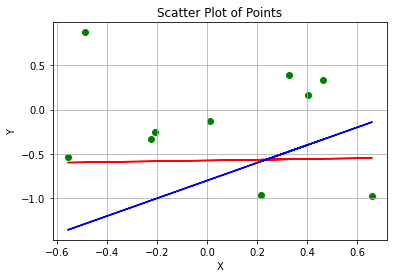

In [62]:
    points = list(zip(X[0], X[1]))
    w1=weights[0,0]
    w2=weights[0,1]
    # Unzip the points for plotting
    x, y = zip(*points)
    line_y = np.array(x) * line[0] + line[1]
    line_z = -(w1 / w2) * np.array(x)-bias/w2
    # Plot the points
    plt.scatter(x, y, c='g', marker='o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Points')
    plt.grid(True)
    plt.plot(x, line_y, c='r')
    plt.plot(x, line_z, c='b')
    plt.show()